In [4]:
%matplotlib notebook

The qRT PCR machine exports an excel sheet with all information. 

In [7]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# to import package in parent folder first add the parent folder to path
import sys
import os
packages_path = Path(os.path.dirname(os.path.realpath('__file__'))).parent
sys.path.insert(0, str(packages_path))

import shared_func

In [8]:
home_path = os.getcwd()

filepath = Path(home_path, 'Fig2_data')
savepath_SI = Path(home_path, 'plots\\SI')
stat_savepath = Path(home_path, 'stats')

Path(savepath_SI).mkdir(parents=True, exist_ok=True) 
Path(stat_savepath).mkdir(parents=True, exist_ok=True)

These are the notes used to plan the experiment and updated as pipetting of the plate was done.

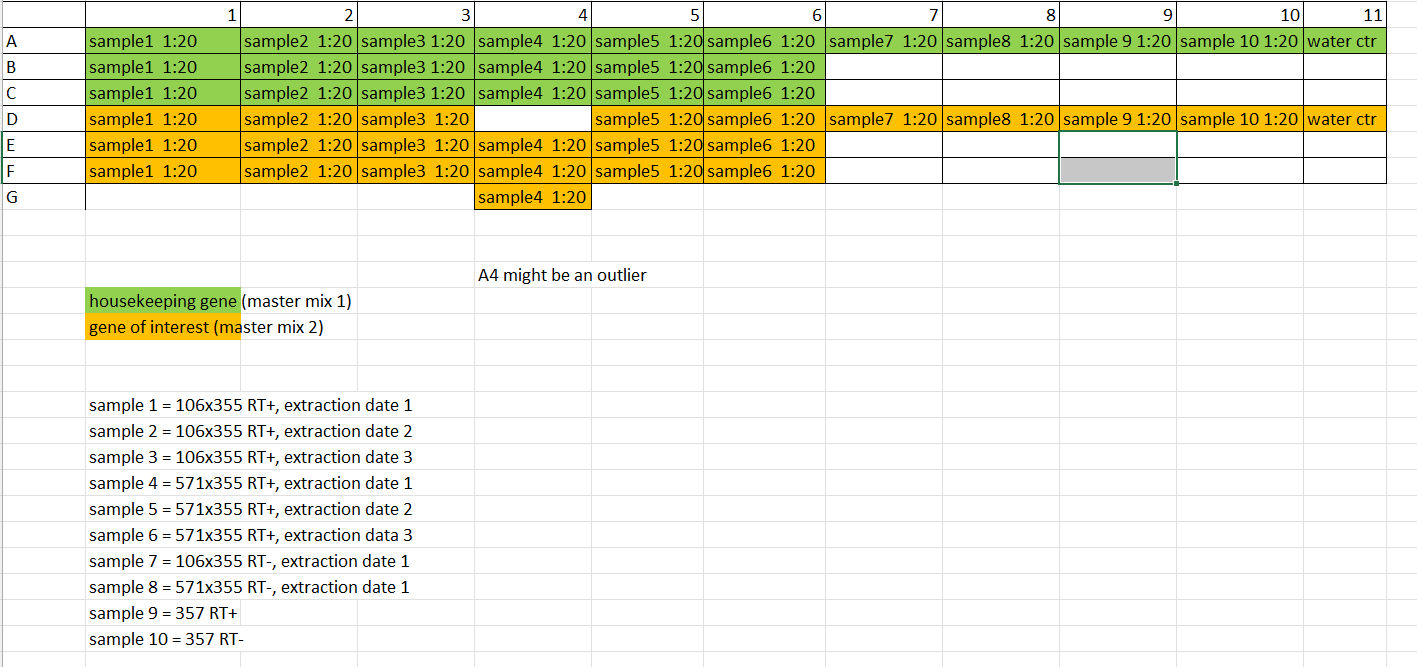

In [9]:
# Prepare lists based on the screenshot above
sample_1_housekeeping = ['A1', 'B1', 'C1']
sample_2_housekeeping = ['A2', 'B2', 'C2']
sample_3_housekeeping = ['A3', 'B3', 'C3']
sample_4_housekeeping = ['A4', 'B4', 'C4']
sample_5_housekeeping = ['A5', 'B5', 'C5']
sample_6_housekeeping = ['A6', 'B6', 'C6']
sample_7_housekeeping = ['A7'] # RT- control of Sample 1
sample_8_housekeeping = ['A8'] # RT- control of Sample 4
sample_9_housekeeping = ['A9'] # no chrimson control, RT+
sample_10_housekeeping = ['A10'] # no chrimson control, RT-
sample_11_housekeeping = ['A11'] # no template control

sample_1_exp = ['D1', 'E1', 'F1']
sample_2_exp = ['D2', 'E2', 'F2']
sample_3_exp = ['D3', 'E3', 'F3']
sample_4_exp = ['G4', 'E4', 'F4']
sample_5_exp = ['D5', 'E5', 'F5']
sample_6_exp = ['D6', 'E6', 'F6']
sample_7_exp = ['D7'] # RT- control of Sample 1
sample_8_exp = ['D8'] # RT- control of Sample 4
sample_9_exp = ['D9'] # no chrimson control, RT+
sample_10_exp = ['D10'] # no chrimson control, RT- 
sample_11_exp = ['D11'] # no template control

In [11]:
current_excel_file = pd.read_excel(Path(filepath, '2022-11-25_132542.xls'),
                                  sheet_name='Melt Curve Raw Data',
                                  header=47)

In [12]:
current_excel_file

Well Well Position  Reading  Temperature   Fluorescence    Derivative  \
0        1            A1        1    60.000198  568687.437500  17852.636719   
1        1            A1        2    60.227619  565623.312500  17917.726562   
2        1            A1        3    60.455040  561426.125000  17980.859375   
3        1            A1        4    60.682461  556659.250000  18020.357422   
4        1            A1        5    60.909882  553708.375000  18023.996094   
...    ...           ...      ...          ...            ...           ...   
7079   148            G4      150    93.885910   -4074.849609      2.271484   
7080   148            G4      151    94.113327   -5138.369629    -13.560547   
7081   148            G4      152    94.340752   -4953.389160    -19.526367   
7082   148            G4      153    94.568176   -4056.729248    -30.583008   
7083   148            G4      154    94.795593   -5260.441406    -50.185547   

     Target Name  
0        666x667  
1        666x667  
2        666x667  
3        666x667  
4        666x667  
...          ...  
7079     591x602  
7080     591x602  
7081     591x602  
7082     591x602  
7083     591x602  

[7084 rows x 7 columns]

In [13]:
# For Color
start = 0.4
stop = 0.8
number_of_samples = 3
cm_subsection = np.linspace(start, stop, number_of_samples) 

colorsGal4pos = [matplotlib.cm.Blues(x) for x in cm_subsection ]
colorsGal4pos = np.array(colorsGal4pos)

colorsGal4neg = [matplotlib.cm.BuPu(x) for x in cm_subsection ]
colorsGal4neg = np.array(colorsGal4neg)

<IPython.core.display.Javascript object>


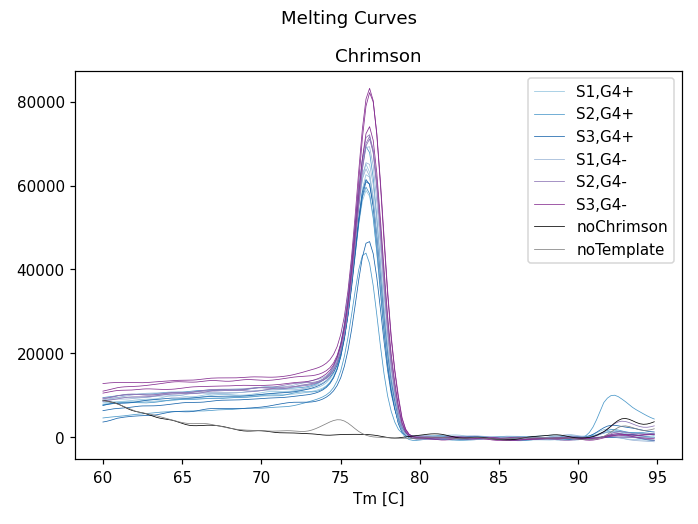

In [16]:
fig = plt.figure()
ax= fig.add_subplot(111)

def plot_melt_curve(data, ax, c='k', label='test'):

    for counter, current_sample in enumerate(data):
        derivative = current_excel_file['Derivative'][current_excel_file['Well Position'] == current_sample]
        reading = current_excel_file['Temperature'][current_excel_file['Well Position'] == current_sample]
        if counter%3==0:
            ax.plot(reading, derivative, c=c, lw=0.5, label=label)
        else:
            ax.plot(reading, derivative, c=c, lw=0.5)

plot_melt_curve(sample_1_exp, ax, c=colorsGal4pos[0], label='S1,G4+')
plot_melt_curve(sample_2_exp, ax, c=colorsGal4pos[1], label='S2,G4+')
plot_melt_curve(sample_3_exp, ax, c=colorsGal4pos[2], label='S3,G4+')
plot_melt_curve(sample_4_exp, ax, c=colorsGal4neg[0], label='S1,G4-')
plot_melt_curve(sample_5_exp, ax, c=colorsGal4neg[1], label='S2,G4-')
plot_melt_curve(sample_6_exp, ax, c=colorsGal4neg[2], label='S3,G4-')
#plot_melt_curve(sample_7_exp, ax)
#plot_melt_curve(sample_8_exp, ax)
plot_melt_curve(sample_9_exp, ax, c='k', label='noChrimson')  # no chrimson control, RT+
plot_melt_curve(sample_10_exp, ax, c='grey', label='noTemplate') # no template control

    
ax.set_xlabel('Tm [C]')
    
ax.legend()

#ax1.set_title('Houskeeping gene')
ax.set_title('Chrimson')

fig.suptitle('Melting Curves')

fig.tight_layout()
fig.savefig(Path(savepath_SI, 'S3A.svg'))